In [1]:
import pickle
import numpy as np

In [2]:
oo_dict = pickle.load(open('oo_dict.pickle', 'rb'))
of_dict = pickle.load(open('of_dict.pickle', 'rb'))
win_shares = pickle.load(open('win_shares.pickle', 'rb'))
all_star_teammates = pickle.load(open('all_star_teammates.pickle', 'rb'))
vorp = pickle.load(open('vorp.pickle', 'rb'))
d_win_shares = pickle.load(open('d_win_shares.pickle', 'rb'))
plus_minus = pickle.load(open('plus_minus.pickle', 'rb'))
games_behind = pickle.load(open('games_behind.pickle', 'rb'))

In [3]:
players = list(oo_dict.keys())

def calculateScore(player):
    v = vorp[player]
    o = win_shares[player]
    d = d_win_shares[player]
    g = games_behind[player]
    
    gb = 0
    if g == 0:
        gb = 6
    if 0 < g and g >= 5:
        gb = 5
    if 5 < g and g >=10:
        gb = 4
    if 10 < g and g >= 15:
        gb = 3
    if 15 < g and g >= 20:
        gb = 2
    else:
        gb = 1
    p = plus_minus[player] + 3
    return 4*v + 3 * .6 * o + 3 * .4 * d + 2 * gb + 1*p

def largestEig(A):
    n = A.shape[1]
    w,v = np.linalg.eig(A)
    firstEigen = v[:n,0]
    realEigen = np.real(firstEigen)
    #Normalize eigenvector:
    normalized = realEigen/np.linalg.norm(firstEigen, 1)
    return abs(normalized)

In [4]:
# Experiment 1: +/- Rating
data_mat = []
for player1 in players:
    row = []
    score1 = calculateScore(player1)
    for player2 in players:
        score2 = calculateScore(player2)
        
        a = 1
        if player1 in oo_dict:
            if player2 in oo_dict[player1]:
                a = oo_dict[player1][player2]
        #row.append(score2/(score1 + score2))
        row.append((a+50))
        
        #row.append(score2/(score1 + score2) * (a+50))
        
    data_mat.append(row)
    
data_mat = np.array(data_mat)
col_sums = data_mat.sum(axis=0)
data_mat = np.divide(data_mat, col_sums)

In [5]:
maxeig = largestEig(data_mat)
print(maxeig)

[ 0.05951148  0.05884102  0.05790616  0.05401961  0.06420707  0.05546321
  0.05307104  0.05706243  0.05500846  0.05399859  0.05066727  0.05259887
  0.05827813  0.05091122  0.05254725  0.0563225   0.05369567  0.05588999]


In [6]:
np.argsort(maxeig)

array([10, 13, 14, 11,  6, 16,  9,  3,  8,  5, 17, 15,  7,  2, 12,  1,  0,
        4], dtype=int64)

In [7]:
# with win-shares as a more important factor
print("Best Players in the NBA Are:\n")
for p in np.argsort(maxeig)[::-1]:
    print(players[p])

Best Players in the NBA Are:

Kevin Durant
James Harden
Kawhi Leonard
DeAndre Jordan
John Wall
Kyle Lowry
Gordon Hayward
Isaiah Thomas
LeBron James
Marc Gasol
Paul Millsap
Kemba Walker
Russell Westbrook
Giannis Antetokounmpo
Paul George
Jimmy Butler
Anthony Davis
Carmelo Anthony


In [8]:
# Experiment 2: Individual Stats
data_mat = []
for player1 in players:
    row = []
    score1 = calculateScore(player1)
    for player2 in players:
        score2 = calculateScore(player2)
        
        a = 1
        if player1 in oo_dict:
            if player2 in oo_dict[player1]:
                a = oo_dict[player1][player2]
        row.append(score2/(score1 + score2))
        #row.append((a+50))
        
        #row.append(score2/(score1 + score2) * (a+50))
        
    data_mat.append(row)
    
data_mat = np.array(data_mat)
col_sums = data_mat.sum(axis=0)
data_mat = np.divide(data_mat, col_sums)

In [9]:
maxeig = largestEig(data_mat)
print(maxeig)

[ 0.04285763  0.04782103  0.05760893  0.0631542   0.04567809  0.04566023
  0.04835661  0.05193956  0.0604793   0.0584105   0.08010481  0.07067578
  0.05680179  0.05597696  0.06362703  0.05522905  0.04158715  0.05403136]


In [10]:
np.argsort(maxeig)

array([16,  0,  5,  4,  1,  6,  7, 17, 15, 13, 12,  2,  9,  8,  3, 14, 11,
       10], dtype=int64)

In [11]:
# with win-shares as a more important factor
print("Best Players in the NBA Are:\n")
for p in np.argsort(maxeig):
    print(players[p])

Best Players in the NBA Are:

Russell Westbrook
James Harden
LeBron James
Kevin Durant
Kawhi Leonard
Giannis Antetokounmpo
Kyle Lowry
Isaiah Thomas
Gordon Hayward
Anthony Davis
DeAndre Jordan
John Wall
Kemba Walker
Marc Gasol
Paul Millsap
Jimmy Butler
Paul George
Carmelo Anthony


In [12]:
# Experiment 3: Individual Stats + Player H2H
data_mat = []
for player1 in players:
    row = []
    score1 = calculateScore(player1)
    for player2 in players:
        score2 = calculateScore(player2)
        
        a = 1
        if player1 in oo_dict:
            if player2 in oo_dict[player1]:
                a = oo_dict[player1][player2]
        #row.append(score2/(score1 + score2))
        #row.append((a+50))
        
        row.append(score2/(score1 + score2) * (a+50))
        
    data_mat.append(row)
    
data_mat = np.array(data_mat)
col_sums = data_mat.sum(axis=0)
data_mat = np.divide(data_mat, col_sums)

In [13]:
maxeig = largestEig(data_mat)
print(maxeig)

[ 0.0463971   0.05062556  0.06062001  0.06163222  0.05306158  0.04616642
  0.04652452  0.05401407  0.05897097  0.05693223  0.07397732  0.06727357
  0.06012547  0.05205154  0.05958002  0.05652896  0.0404643   0.05505415]


In [14]:
np.argsort(maxeig)

array([16,  5,  0,  6,  1, 13,  4,  7, 17, 15,  9,  8, 14, 12,  2,  3, 11,
       10], dtype=int64)

In [15]:
# with win-shares as a more important factor
print("Best Players in the NBA Are:\n")
for p in np.argsort(maxeig):
    print(players[p])

Best Players in the NBA Are:

Russell Westbrook
LeBron James
James Harden
Giannis Antetokounmpo
Kawhi Leonard
Anthony Davis
Kevin Durant
Kyle Lowry
Isaiah Thomas
Gordon Hayward
Kemba Walker
Marc Gasol
Jimmy Butler
DeAndre Jordan
John Wall
Paul Millsap
Paul George
Carmelo Anthony


In [16]:
# players in contention for mvp this season
mvp_candidates = ["LeBron James", "Isaiah Thomas", "Russell Westbrook", "Kawhi Leonard", "James Harden"]
mvp_candidate_mat = []
for player1 in mvp_candidates:
    row = []
    score1 = calculateScore(player1)
    for player2 in mvp_candidates:
        score2 = calculateScore(player2)
        row.append(score2/(score1 + score2) * (a+50))
    mvp_candidate_mat.append(row)
mvp_candidate_mat = np.array(mvp_candidate_mat)
col_sums = mvp_candidate_mat.sum(axis=0)
mvp_candidate_mat = np.divide(mvp_candidate_mat, col_sums)


In [17]:
maxeig = largestEig(mvp_candidate_mat)
print(maxeig)

[ 0.19754674  0.22763445  0.18226103  0.2054827   0.18707508]


In [18]:
np.argsort(maxeig)

array([2, 4, 0, 3, 1], dtype=int64)

In [19]:
for p in np.argsort(maxeig):
    print(mvp_candidates[p])

Russell Westbrook
James Harden
LeBron James
Kawhi Leonard
Isaiah Thomas


In [20]:
# Extra: Simulate 7 game series between two teams of all stars
# Just a simple fun application of Markov Chains with changing probabilites
# TODO: Fill in with players of your choice from the all star list, just make sure they are unique
teamA = ["LeBron James", "Kevin Durant", "Carmelo Anthony", "Kawhi Leonard", "Anthony Davis"]
teamB = ["James Harden", "Russell Westbrook", "Paul George", "Jimmy Butler", "John Wall"]

def calculate_avg_score(teamA, teamB):
    teamA_avg = 0
    teamB_avg = 0
    for player in teamA:
        teamA_avg += calculateScore(player)
    teamA_avg /= 5
    
    for player in teamB:
        teamB_avg += calculateScore(player)
    
    teamB_avg /= 5
    
    return teamA_avg, teamB_avg

a_score, b_score = calculate_avg_score(teamA, teamB)

In [21]:
pr_a = a_score*1.0/(a_score + b_score)
pr_b = b_score*1.0/(a_score + b_score)

print (pr_a)
print (pr_b)

0.5022175290390708
0.49778247096092926


In [22]:
import random
import matplotlib.pyplot as plt

def plot_wins(a_wins, a_games, b_wins, b_games):
    f, axarr = plt.subplots(2, sharex=True)
    axarr[0].scatter(a_wins, a_games)
    axarr[0].set_title('Number of wins to win series for Team A')
    axarr[1].scatter(b_wins, b_games)
    axarr[1].set_title('Number of wins to win series for Team B')
    
    print("Team A won " + str(len(a_games)) + " games")
    print("Team A took on average " + str(sum(a_games) * 1.0 /len(a_games)) + " games to win")
    
    print("Team B won " + str(len(b_games)) + " games")
    print("Team B took on average " + str(sum(b_games) * 1.0 /len(b_games)) + " games to win")
    plt.show()

In [23]:
# Simulation 1: Winning Team Gets Home Court Advantage

def simulation1(num_simulations, handicap, state):
    a_home_adv = pr_a + handicap
    b_home_adv = pr_b + handicap
    a_away_adv = pr_a - handicap
    b_away_adv = pr_b - handicap

    mat = [[a_home_adv, b_away_adv], [a_away_adv, b_home_adv]]

    a_wins = []
    a_num_games = []
    b_wins = []
    b_num_games = []
    for sim in range(num_simulations):
        teamA_wins = 0
        teamB_wins = 0
        for i in range(7):
            state = np.matmul(state, mat)
            rand = random.uniform(0,1)
            if rand <= state[0]:
                teamA_wins += 1
                state = [1,0]
            else:
                teamB_wins += 1
                state = [0,1]

            if teamA_wins == 4:
                a_wins.append(sim)
                a_num_games.append(i+1)
                break
            elif teamB_wins == 4:
                b_wins.append(sim)
                b_num_games.append(i+1)
                break
    return a_wins, a_num_games, b_wins, b_num_games

Team A won 51 games
Team A took on average 5.784313725490196 games to win
Team B won 49 games
Team B took on average 5.857142857142857 games to win


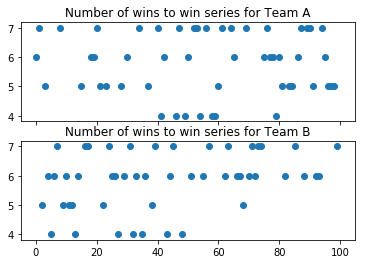

In [24]:
state = [1, 0] 
a_wins, a_num_games, b_wins, b_num_games = simulation1(100, 0, state)
plot_wins(a_wins, a_num_games, b_wins, b_num_games)

Team A won 50 games
Team A took on average 5.4 games to win
Team B won 50 games
Team B took on average 5.68 games to win


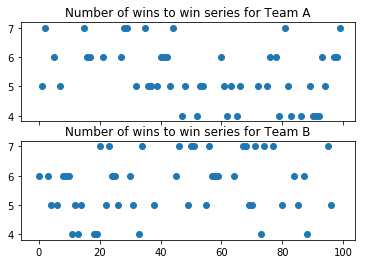

In [25]:
a_wins, a_num_games, b_wins, b_num_games = simulation1(100, 0.05, state)
plot_wins(a_wins, a_num_games, b_wins, b_num_games)

Team A won 47 games
Team A took on average 5.425531914893617 games to win
Team B won 53 games
Team B took on average 5.735849056603773 games to win


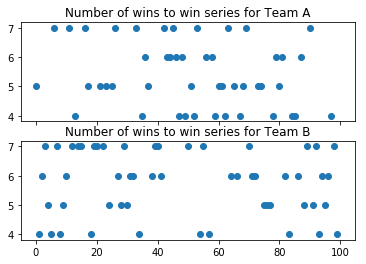

In [26]:
a_wins, a_num_games, b_wins, b_num_games = simulation1(100, 0.1, state)
plot_wins(a_wins, a_num_games, b_wins, b_num_games)

Team A won 261 games
Team A took on average 5.777777777777778 games to win
Team B won 239 games
Team B took on average 5.882845188284519 games to win


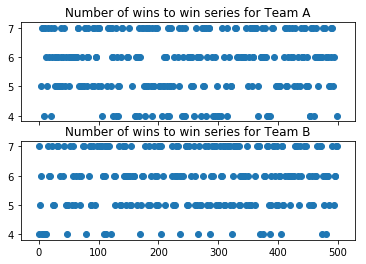

In [27]:
a_wins, a_num_games, b_wins, b_num_games = simulation1(500, 0, state)
plot_wins(a_wins, a_num_games, b_wins, b_num_games)

Team A won 242 games
Team A took on average 5.690082644628099 games to win
Team B won 258 games
Team B took on average 5.817829457364341 games to win


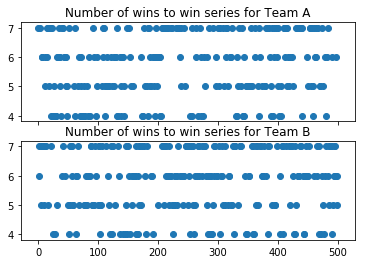

In [28]:
a_wins, a_num_games, b_wins, b_num_games = simulation1(500, 0.05, state)
plot_wins(a_wins, a_num_games, b_wins, b_num_games)

Team A won 264 games
Team A took on average 5.465909090909091 games to win
Team B won 236 games
Team B took on average 5.601694915254237 games to win


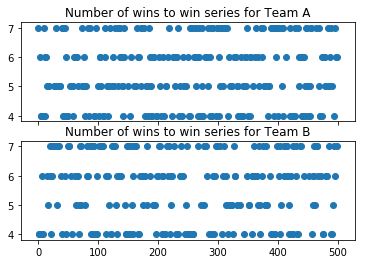

In [29]:
a_wins, a_num_games, b_wins, b_num_games = simulation1(500, 0.1, state)
plot_wins(a_wins, a_num_games, b_wins, b_num_games)

Team A won 496 games
Team A took on average 5.796370967741935 games to win
Team B won 504 games
Team B took on average 5.791666666666667 games to win


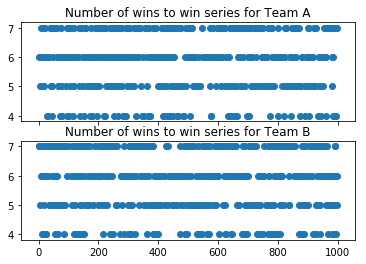

In [30]:
a_wins, a_num_games, b_wins, b_num_games = simulation1(1000, 0, state)
plot_wins(a_wins, a_num_games, b_wins, b_num_games)

Team A won 494 games
Team A took on average 5.7105263157894735 games to win
Team B won 506 games
Team B took on average 5.711462450592886 games to win


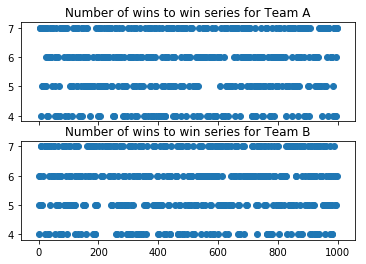

In [31]:
a_wins, a_num_games, b_wins, b_num_games = simulation1(1000, 0.05, state)
plot_wins(a_wins, a_num_games, b_wins, b_num_games)

Team A won 506 games
Team A took on average 5.525691699604743 games to win
Team B won 494 games
Team B took on average 5.532388663967612 games to win


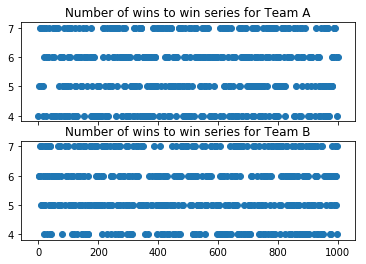

In [32]:
a_wins, a_num_games, b_wins, b_num_games = simulation1(1000, 0.1, state)
plot_wins(a_wins, a_num_games, b_wins, b_num_games)

Team A won 51 games
Team A took on average 5.764705882352941 games to win
Team B won 49 games
Team B took on average 5.836734693877551 games to win


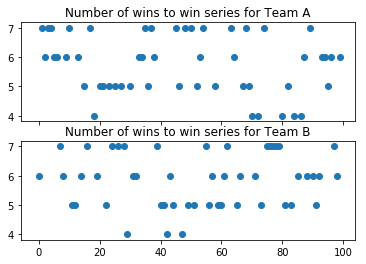

In [33]:
state = [0, 1] 
a_wins, a_num_games, b_wins, b_num_games = simulation1(100, 0, state)
plot_wins(a_wins, a_num_games, b_wins, b_num_games)

Team A won 47 games
Team A took on average 5.297872340425532 games to win
Team B won 53 games
Team B took on average 5.7924528301886795 games to win


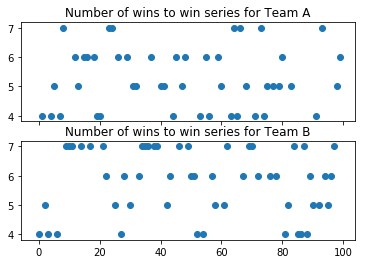

In [34]:
a_wins, a_num_games, b_wins, b_num_games = simulation1(100, 0.05, state)
plot_wins(a_wins, a_num_games, b_wins, b_num_games)

Team A won 47 games
Team A took on average 5.914893617021277 games to win
Team B won 53 games
Team B took on average 5.69811320754717 games to win


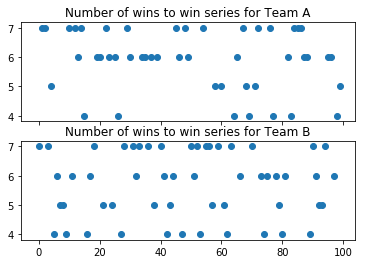

In [35]:
a_wins, a_num_games, b_wins, b_num_games = simulation1(100, 0.1, state)
plot_wins(a_wins, a_num_games, b_wins, b_num_games)

Team A won 249 games
Team A took on average 5.779116465863454 games to win
Team B won 251 games
Team B took on average 5.749003984063745 games to win


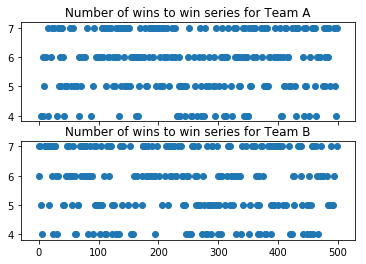

In [36]:
a_wins, a_num_games, b_wins, b_num_games = simulation1(500, 0, state)
plot_wins(a_wins, a_num_games, b_wins, b_num_games)

Team A won 257 games
Team A took on average 5.712062256809339 games to win
Team B won 243 games
Team B took on average 5.662551440329218 games to win


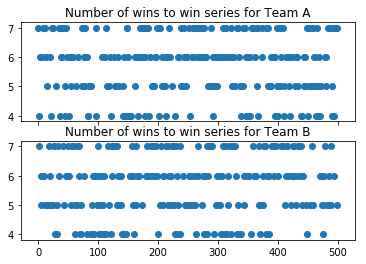

In [37]:
a_wins, a_num_games, b_wins, b_num_games = simulation1(500, 0.05, state)
plot_wins(a_wins, a_num_games, b_wins, b_num_games)

Team A won 257 games
Team A took on average 5.638132295719845 games to win
Team B won 243 games
Team B took on average 5.539094650205762 games to win


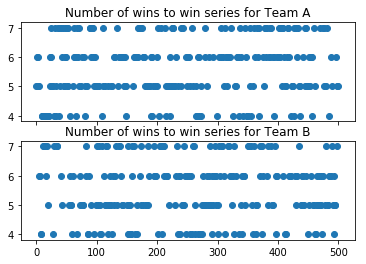

In [38]:
a_wins, a_num_games, b_wins, b_num_games = simulation1(500, 0.1, state)
plot_wins(a_wins, a_num_games, b_wins, b_num_games)

Team A won 515 games
Team A took on average 5.790291262135923 games to win
Team B won 485 games
Team B took on average 5.855670103092783 games to win


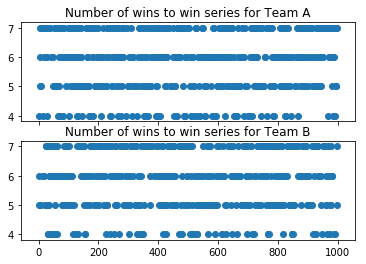

In [39]:
a_wins, a_num_games, b_wins, b_num_games = simulation1(1000, 0, state)
plot_wins(a_wins, a_num_games, b_wins, b_num_games)

Team A won 496 games
Team A took on average 5.639112903225806 games to win
Team B won 504 games
Team B took on average 5.674603174603175 games to win


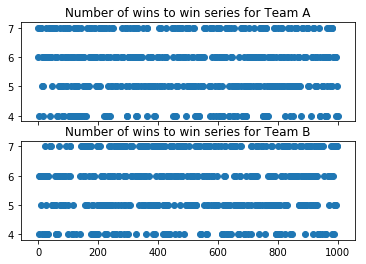

In [40]:
a_wins, a_num_games, b_wins, b_num_games = simulation1(1000, 0.05, state)
plot_wins(a_wins, a_num_games, b_wins, b_num_games)

Team A won 503 games
Team A took on average 5.584493041749503 games to win
Team B won 497 games
Team B took on average 5.51307847082495 games to win


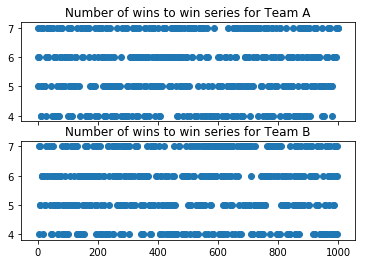

In [41]:
a_wins, a_num_games, b_wins, b_num_games = simulation1(1000, 0.1, state)
plot_wins(a_wins, a_num_games, b_wins, b_num_games)

In [42]:
# Simulation 2: NBA Style
# Games 1, 2, 5, 7 --> Higher Ranked Team
# Games 3, 4, 6 --> lower Ranked Team

def simulation2(num_simulations, handicap):
    a_home_adv = pr_a + handicap
    b_home_adv = pr_b + handicap
    a_away_adv = pr_a - handicap
    b_away_adv = pr_b - handicap

    mat = [[a_home_adv, b_away_adv], [a_away_adv, b_home_adv]]

    a_wins = []
    a_num_games = []
    b_wins = []
    b_num_games = []
    for sim in range(num_simulations):
        teamA_wins = 0
        teamB_wins = 0
        for i in range(7):
            if i+1 in [1,2,5,7]:
                state = [1, 0]
            else:
                state = [0, 1]
            state = np.matmul(state, mat)
            rand = random.uniform(0,1)
            if rand <= state[0]:
                teamA_wins += 1
            else:
                teamB_wins += 1

            if teamA_wins == 4:
                a_wins.append(sim)
                a_num_games.append(i+1)
                break
            elif teamB_wins == 4:
                b_wins.append(sim)
                b_num_games.append(i+1)
                break
    return a_wins, a_num_games, b_wins, b_num_games

Team A won 52 games
Team A took on average 5.980769230769231 games to win
Team B won 48 games
Team B took on average 6.0625 games to win


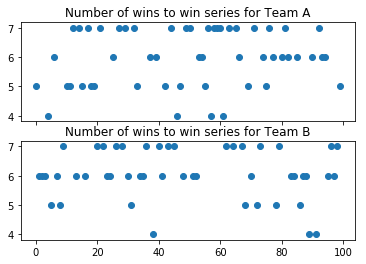

In [43]:
a_wins, a_num_games, b_wins, b_num_games = simulation2(100, 0)
plot_wins(a_wins, a_num_games, b_wins, b_num_games)

Team A won 51 games
Team A took on average 6.0 games to win
Team B won 49 games
Team B took on average 5.877551020408164 games to win


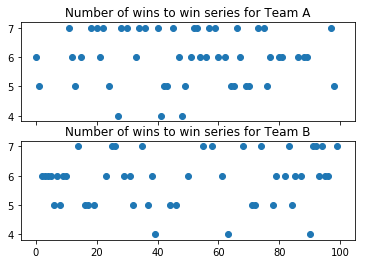

In [44]:
a_wins, a_num_games, b_wins, b_num_games = simulation2(100, 0.05)
plot_wins(a_wins, a_num_games, b_wins, b_num_games)

Team A won 56 games
Team A took on average 5.785714285714286 games to win
Team B won 44 games
Team B took on average 5.954545454545454 games to win


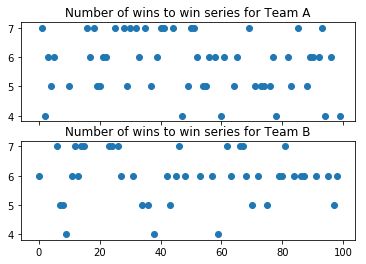

In [45]:
a_wins, a_num_games, b_wins, b_num_games = simulation2(100, 0.1)
plot_wins(a_wins, a_num_games, b_wins, b_num_games)

Team A won 252 games
Team A took on average 5.833333333333333 games to win
Team B won 248 games
Team B took on average 5.758064516129032 games to win


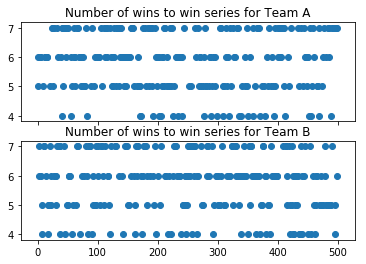

In [46]:
a_wins, a_num_games, b_wins, b_num_games = simulation2(500, 0)
plot_wins(a_wins, a_num_games, b_wins, b_num_games)

Team A won 265 games
Team A took on average 5.8641509433962264 games to win
Team B won 235 games
Team B took on average 5.868085106382979 games to win


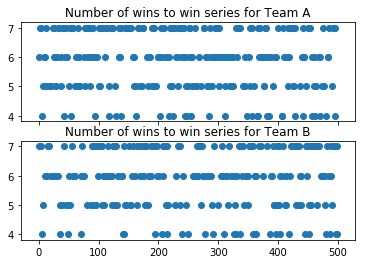

In [47]:
a_wins, a_num_games, b_wins, b_num_games = simulation2(500, 0.05)
plot_wins(a_wins, a_num_games, b_wins, b_num_games)

Team A won 256 games
Team A took on average 5.92578125 games to win
Team B won 244 games
Team B took on average 5.905737704918033 games to win


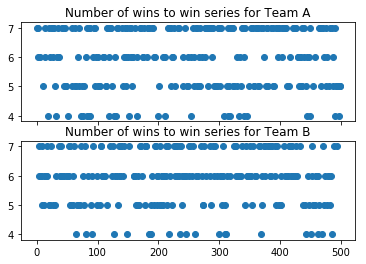

In [48]:
a_wins, a_num_games, b_wins, b_num_games = simulation2(500, 0.1)
plot_wins(a_wins, a_num_games, b_wins, b_num_games)

Team A won 495 games
Team A took on average 5.797979797979798 games to win
Team B won 505 games
Team B took on average 5.867326732673267 games to win


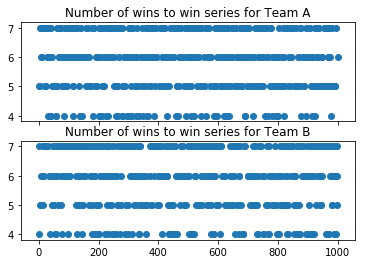

In [49]:
a_wins, a_num_games, b_wins, b_num_games = simulation2(1000, 0)
plot_wins(a_wins, a_num_games, b_wins, b_num_games)

Team A won 536 games
Team A took on average 5.791044776119403 games to win
Team B won 464 games
Team B took on average 5.734913793103448 games to win


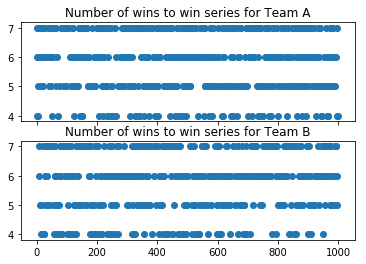

In [50]:
a_wins, a_num_games, b_wins, b_num_games = simulation2(1000, 0.05)
plot_wins(a_wins, a_num_games, b_wins, b_num_games)

Team A won 534 games
Team A took on average 5.825842696629214 games to win
Team B won 466 games
Team B took on average 5.783261802575107 games to win


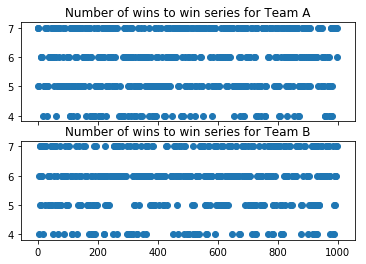

In [51]:
a_wins, a_num_games, b_wins, b_num_games = simulation2(1000, 0.1)
plot_wins(a_wins, a_num_games, b_wins, b_num_games)

In [52]:
# Simulation 3: Losing Team Gets Home Court Advantage

def simulation3(num_simulations, handicap, state):
    a_home_adv = pr_a + handicap
    b_home_adv = pr_b + handicap
    a_away_adv = pr_a - handicap
    b_away_adv = pr_b - handicap

    mat = [[a_home_adv, b_away_adv], [a_away_adv, b_home_adv]]

    a_wins = []
    a_num_games = []
    b_wins = []
    b_num_games = []
    for sim in range(num_simulations):
        teamA_wins = 0
        teamB_wins = 0
        for i in range(7):
            state = np.matmul(state, mat)
            rand = random.uniform(0,1)
            if rand <= state[0]:
                teamA_wins += 1
                state = [0,1]
            else:
                teamB_wins += 1
                state = [1,0]

            if teamA_wins == 4:
                a_wins.append(sim)
                a_num_games.append(i+1)
                break
            elif teamB_wins == 4:
                b_wins.append(sim)
                b_num_games.append(i+1)
                break
    return a_wins, a_num_games, b_wins, b_num_games

Team A won 50 games
Team A took on average 5.56 games to win
Team B won 50 games
Team B took on average 5.74 games to win


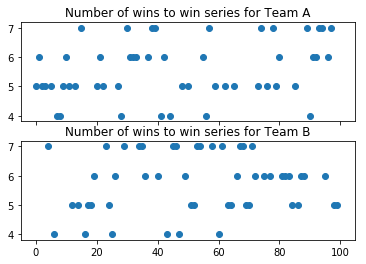

In [53]:
state = [1, 0] 
a_wins, a_num_games, b_wins, b_num_games = simulation3(100, 0, state)
plot_wins(a_wins, a_num_games, b_wins, b_num_games)

Team A won 38 games
Team A took on average 6.078947368421052 games to win
Team B won 62 games
Team B took on average 5.951612903225806 games to win


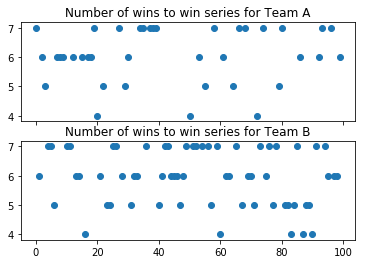

In [ ]:
a_wins, a_num_games, b_wins, b_num_games = simulation3(100, 0.05, state)
plot_wins(a_wins, a_num_games, b_wins, b_num_games)

In [ ]:
a_wins, a_num_games, b_wins, b_num_games = simulation3(100, 0.1, state)
plot_wins(a_wins, a_num_games, b_wins, b_num_games)

In [ ]:
a_wins, a_num_games, b_wins, b_num_games = simulation3(500, 0, state)
plot_wins(a_wins, a_num_games, b_wins, b_num_games)


In [ ]:
a_wins, a_num_games, b_wins, b_num_games = simulation3(500, 0.05, state)
plot_wins(a_wins, a_num_games, b_wins, b_num_games)


In [ ]:
a_wins, a_num_games, b_wins, b_num_games = simulation3(500, 0.1, state)
plot_wins(a_wins, a_num_games, b_wins, b_num_games)


In [ ]:
a_wins, a_num_games, b_wins, b_num_games = simulation3(1000, 0, state)
plot_wins(a_wins, a_num_games, b_wins, b_num_games)


In [ ]:
a_wins, a_num_games, b_wins, b_num_games = simulation3(1000, 0.05, state)
plot_wins(a_wins, a_num_games, b_wins, b_num_games)


In [ ]:
a_wins, a_num_games, b_wins, b_num_games = simulation3(1000, 0.1, state)
plot_wins(a_wins, a_num_games, b_wins, b_num_games)


In [ ]:
state = [0, 1] 
a_wins, a_num_games, b_wins, b_num_games = simulation3(100, 0, state)
plot_wins(a_wins, a_num_games, b_wins, b_num_games)


In [ ]:
a_wins, a_num_games, b_wins, b_num_games = simulation3(100, 0.05, state)
plot_wins(a_wins, a_num_games, b_wins, b_num_games)


In [ ]:
a_wins, a_num_games, b_wins, b_num_games = simulation3(100, 0.1, state)
plot_wins(a_wins, a_num_games, b_wins, b_num_games)


In [ ]:
a_wins, a_num_games, b_wins, b_num_games = simulation3(500, 0, state)
plot_wins(a_wins, a_num_games, b_wins, b_num_games)


In [ ]:
a_wins, a_num_games, b_wins, b_num_games = simulation3(500, 0.05, state)
plot_wins(a_wins, a_num_games, b_wins, b_num_games)


In [ ]:
a_wins, a_num_games, b_wins, b_num_games = simulation3(500, 0.1, state)
plot_wins(a_wins, a_num_games, b_wins, b_num_games)

In [ ]:
a_wins, a_num_games, b_wins, b_num_games = simulation3(1000, 0, state)
plot_wins(a_wins, a_num_games, b_wins, b_num_games)

In [ ]:
a_wins, a_num_games, b_wins, b_num_games = simulation3(1000, 0.05, state)
plot_wins(a_wins, a_num_games, b_wins, b_num_games)

In [ ]:
a_wins, a_num_games, b_wins, b_num_games = simulation3(1000, 0.1, state)
plot_wins(a_wins, a_num_games, b_wins, b_num_games)